In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df = df.iloc[: , 2:]


<AxesSubplot:>

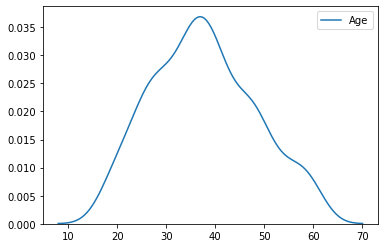

In [8]:
sns.kdeplot(df['Age'])

<AxesSubplot:>

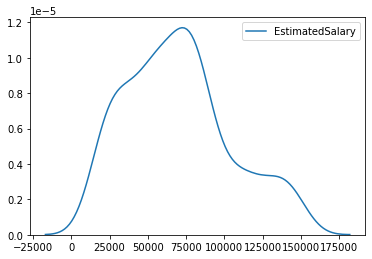

In [9]:
sns.kdeplot(df['EstimatedSalary'])

# <font color = 'brown'>Train Test split</font>

In [10]:
X =df.drop('Purchased' , axis = 1)
y=df['Purchased']

In [11]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3, random_state = 2)

In [12]:
X_train.shape,X_test.shape

((280, 2), (120, 2))

# <font color = 'brown'>Standard Scaler</font>

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
ss.fit(X_train)

StandardScaler()

In [14]:
#transform train and test sets
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [15]:
ss.mean_

array([3.77642857e+01, 6.99000000e+04])

In [16]:
X_train

,Age,EstimatedSalary
112,38,61000
209,46,22000
294,35,57000
307,47,113000
345,41,63000
...,...,...
299,46,117000
22,48,41000
72,20,23000
15,29,80000


In [17]:
X_train_scaled

array([[ 0.02273414, -0.26389006],
       [ 0.79431698, -1.42026223],
       [-0.26660943, -0.38249233],
       [ 0.89076483,  1.2779395 ],
       [ 0.3120777 , -0.20458892],
       [-0.26660943, -0.59004631],
       [-0.26660943, -1.42026223],
       [ 1.46945196, -1.06445541],
       [-0.07371372,  0.12156733],
       [-0.84529656, -0.67899802],
       [-0.07371372,  0.00296506],
       [-0.26660943,  0.09191676],
       [ 0.21562985, -0.3231912 ],
       [-0.26660943,  0.26982017],
       [ 0.11918199,  0.03261563],
       [ 1.95169124,  2.19710712],
       [-1.03819227, -1.47956337],
       [ 0.3120777 ,  0.29947074],
       [ 2.04813909, -1.21270825],
       [-1.13464012, -0.53074518],
       [ 0.21562985,  0.1512179 ],
       [-0.26660943, -0.94585313],
       [-0.65240085,  0.03261563],
       [ 0.21562985,  0.06226619],
       [ 0.40852556, -0.14528779],
       [-1.13464012, -1.12375655],
       [-0.07371372,  2.25640826],
       [ 1.08366054, -0.14528779],
       [ 0.89076483,

In [18]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)

In [19]:
np.round(X_train.describe() , 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.8,69900.0
std,10.4,33786.6
min,18.0,15000.0
25%,30.0,43750.0
50%,37.0,70500.0
75%,46.0,87000.0
max,60.0,150000.0


In [20]:
np.round(X_train_scaled.describe() , 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.4


## <font color = 'brown'>Effect of Scaling </font>

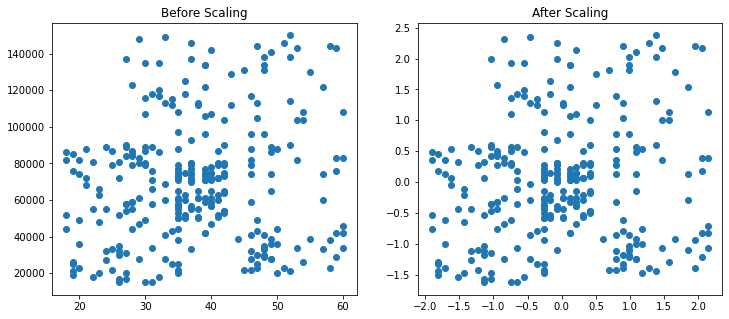

In [21]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize=(12 ,5))
ax1.scatter(X_train['Age'] , X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'] , X_train_scaled['EstimatedSalary'])
ax2.set_title('After Scaling')
plt.show()

<AxesSubplot:title={'center':'After Scaling'}>

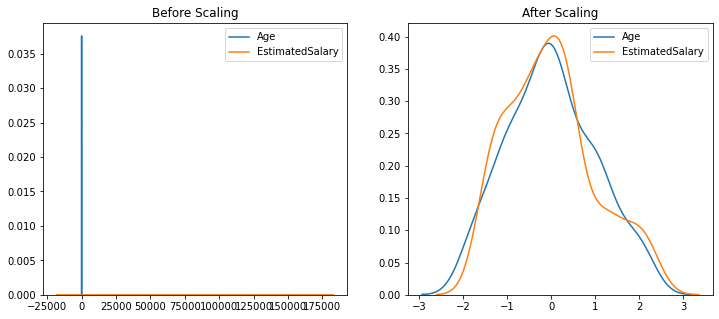

In [28]:
fig , (ax1,ax2)  = plt.subplots(ncols =2 , figsize = (12,5))
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'] , ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'] , ax = ax1)
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'] , ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'] , ax = ax2)

<font color ='blue'>**Why Scaling is important?** </font>

<font color = 'green'>**Without Scaling**</font>

## <font color = 'brown'>Logistic Regression </font>

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train , y_train)
lr.score(X_train , y_train) 

0.6428571428571429

In [40]:
lr_scaled = LogisticRegression()
lr_scaled.fit(X_train_scaled , y_train)
lr_scaled.score(X_train_scaled , y_train)

0.8464285714285714

Here you can see score of scaled data is better than non scaled data

In [41]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [42]:
from sklearn.metrics import accuracy_score
print('Actual : ' , accuracy_score(y_test , y_pred))
print("Scaled : " , accuracy_score(y_test , y_pred_scaled))

Actual :  0.6416666666666667
Scaled :  0.8416666666666667


## <font color = 'brown'>Decision Tree Classifier</font>

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()
dt.fit(X_train , y_train)
dt_scaled.fit(X_train_scaled , y_train)

DecisionTreeClassifier()

In [45]:
print('Actual' , dt.score(X_train , y_train))
print('Scaled' , dt_scaled.score(X_train_scaled , y_train))

Actual 1.0
Scaled 1.0


In [47]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [57]:
print('Actual' , accuracy_score(y_test , y_pred))
print('Scaled' , accuracy_score(y_test , y_pred_scaled))

Actual 0.875
Scaled 0.8833333333333333


## <font color ='brown'>Effect of Outlier</font>

In [65]:
dict = {'Age':[5,90,95] , 'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}
df = df.append(pd.DataFrame(dict) , ignore_index = True)

In [66]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

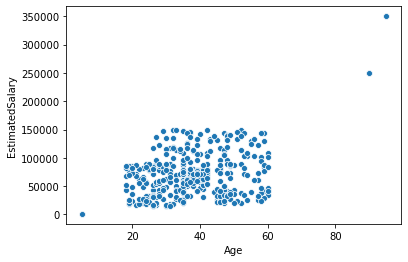

In [67]:
sns.scatterplot(x=df['Age'] , y=df['EstimatedSalary'])